In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from pydataset import data
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
#Nuestro objetivos es reducir el numero de variables

C:\Users\Ruben\AppData\Local\Temp\ipykernel_10244\2265985464.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = data('pneumon')
df = df.dropna()
df=df.iloc[0:199,]
df.head()

,chldage,hospital,mthage,urban,alcohol,smoke,region,poverty,bweight,race,education,nsibs,wmonth,sfmonth,agepn
1,12.0,0,22,1,0,0,1,1,1,1,10,1,1,1,1
2,12.0,0,20,1,1,0,1,1,0,1,12,1,2,2,12
3,3.0,0,24,1,3,0,1,1,0,1,12,2,1,0,3
4,2.0,0,22,1,2,2,1,1,0,1,9,0,0,0,2
5,4.0,0,21,1,1,2,1,1,1,1,12,0,0,0,4


In [3]:
df.describe()

,chldage,hospital,mthage,urban,alcohol,smoke,region,poverty,bweight,race,education,nsibs,wmonth,sfmonth,agepn
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,9.899497,0.010050,21.994975,0.914573,0.954774,0.512563,1.613065,0.934673,0.221106,1.236181,11.758794,0.507538,2.030151,1.130653,7.778894
std,3.516907,0.099997,2.712667,0.280221,1.173342,0.673145,0.663652,0.247725,0.416038,0.550021,1.790015,0.730776,3.533261,1.776108,4.454184
min,0.500000,0.000000,16.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,20.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,11.000000,0.000000,0.000000,0.000000,3.000000
50%,12.000000,0.000000,22.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,12.000000,0.000000,0.000000,0.000000,9.000000
75%,12.000000,0.000000,24.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,12.000000,1.000000,3.000000,2.000000,12.000000
max,12.000000,1.000000,28.000000,1.000000,4.000000,2.000000,4.000000,1.000000,1.000000,3.000000,16.000000,4.000000,20.000000,9.000000,12.000000


In [4]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.598765,-0.100759,0.001857,0.305625,-0.815774,-0.763365,-0.926105,0.264372,1.876893,-0.430487,-0.985037,0.675589,-0.292293,-0.073747,-1.525755
1,0.598765,-0.100759,-0.737284,0.305625,0.038642,-0.763365,-0.926105,0.264372,-0.532795,-0.430487,0.135091,0.675589,-0.008555,0.490702,0.950062
2,-1.966756,-0.100759,0.740999,0.305625,1.747473,-0.763365,-0.926105,0.264372,-0.532795,-0.430487,0.135091,2.047448,-0.292293,-0.638196,-1.075606
3,-2.251814,-0.100759,0.001857,0.305625,0.893058,2.215256,-0.926105,0.264372,-0.532795,-0.430487,-1.545100,-0.696270,-0.576032,-0.638196,-1.300680
4,-1.681698,-0.100759,-0.367714,0.305625,0.038642,2.215256,-0.926105,0.264372,1.876893,-0.430487,0.135091,-0.696270,-0.576032,-0.638196,-0.850532


In [5]:
df_scaled.describe()
#se resta la media para que la media sea 0, y se normalza con std = 1, divide con la varianza

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,199.000000,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02
mean,6.248491e-17,-1.171592e-17,-1.785283e-17,1.785283e-16,0.000000,-8.926416e-18,-7.141133e-17,-1.651387e-16,-8.033775e-17,-4.909529e-17,-4.552472e-16,3.124246e-17,5.355850e-17,6.248491e-17,-8.926416e-17
std,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00,1.002522,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00
min,-2.679401e+00,-1.007585e-01,-2.215567e+00,-3.271984e+00,-0.815774,-7.633653e-01,-9.261046e-01,-3.782551e+00,-5.327954e-01,-4.304867e-01,-6.025609e+00,-6.962703e-01,-5.760318e-01,-6.381958e-01,-1.750829e+00
25%,-5.414667e-01,-1.007585e-01,-7.372842e-01,3.056249e-01,-0.815774,-7.633653e-01,-9.261046e-01,2.643718e-01,-5.327954e-01,-4.304867e-01,-4.249729e-01,-6.962703e-01,-5.760318e-01,-6.381958e-01,-1.075606e+00
50%,5.987648e-01,-1.007585e-01,1.857139e-03,3.056249e-01,0.038642,-7.633653e-01,5.845086e-01,2.643718e-01,-5.327954e-01,-4.304867e-01,1.350907e-01,-6.962703e-01,-5.760318e-01,-6.381958e-01,2.748394e-01
75%,5.987648e-01,-1.007585e-01,7.409985e-01,3.056249e-01,0.893058,7.259454e-01,5.845086e-01,2.643718e-01,-5.327954e-01,-4.304867e-01,1.350907e-01,6.755890e-01,2.751835e-01,4.907017e-01,9.500621e-01
max,5.987648e-01,9.924717e+00,2.219281e+00,3.056249e-01,2.601889,2.215256e+00,3.605735e+00,2.643718e-01,1.876893e+00,3.214911e+00,2.375345e+00,4.791167e+00,5.098737e+00,4.441843e+00,9.500621e-01


In [6]:
#ahora empezamos nuestro PCA , solo queremos dos PC
pca_2c = PCA(n_components=2)
X_pca_2c = pca_2c.fit_transform(df_scaled)
X_pca_2c

array([[-7.50045820e-01,  7.27678626e-01],
       [-9.90201361e-02, -6.87074367e-01],
       [ 1.12891473e+00,  2.86182670e+00],
       [-3.85650171e-01,  2.54058770e+00],
       [-1.00740968e+00,  1.93324770e+00],
       [-8.36856273e-01, -5.26950166e-01],
       [ 4.70776301e-01,  1.42421526e+00],
       [ 2.14081744e+00,  1.50334772e+00],
       [ 6.25152230e-01,  1.65179493e+00],
       [ 6.50323113e-02, -1.03639408e+00],
       [ 6.16683509e-01, -1.10031924e-02],
       [ 1.15464941e+00,  6.59478076e-01],
       [-5.94884239e-01,  1.55543364e+00],
       [ 1.74928173e+00,  1.24373858e+00],
       [-1.67960224e+00,  5.02195766e-01],
       [-5.10219406e-01,  1.04742899e+00],
       [ 8.70689954e-01, -8.57221059e-01],
       [ 2.08423512e+00, -2.48615629e-01],
       [ 2.83326253e+00, -2.66738165e+00],
       [-1.48380776e+00, -1.33592407e+00],
       [ 6.97096476e-01,  2.91189341e+00],
       [ 1.32747141e+00,  3.74906193e+00],
       [ 1.77783570e+00,  1.66063033e-01],
       [ 3.

In [7]:
pca_2c.explained_variance_ratio_

array([0.18201588, 0.12022734])

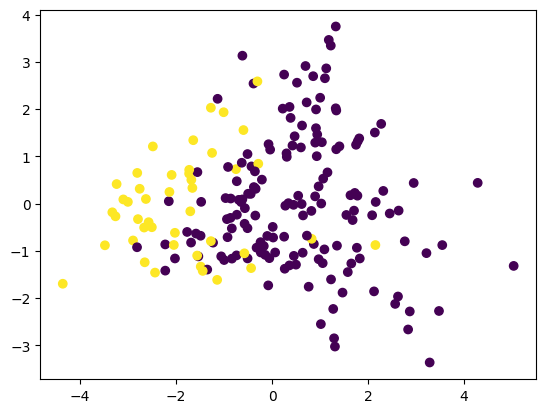

In [8]:
#Aqui vemos como los compenentes separan las variables, esto solo lo podemos ver porque estamos en dimension dos, para algunas funciona mejor que para otras varables
plt.scatter(X_pca_2c[:,0],X_pca_2c[:,1],c=df_scaled[8])

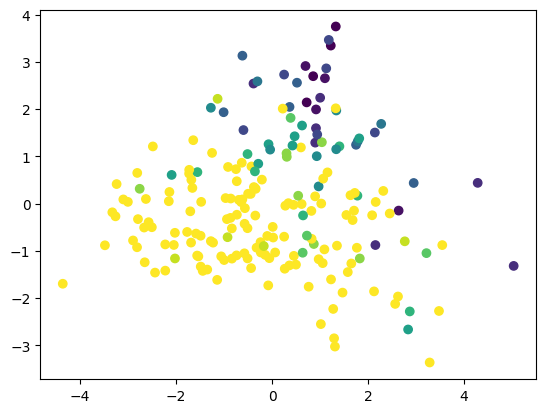

In [9]:
plt.scatter(X_pca_2c[:,0],X_pca_2c[:,1],c=df_scaled[0])

In [10]:
#ahora lo vemos con 5 varibles
pca_4c = PCA(n_components=4)
X_pca_4c = pca_4c.fit_transform(df_scaled)
pca_4c.explained_variance_ratio_

array([0.18201588, 0.12022734, 0.09290502, 0.08945079])

In [11]:
# Otro ejemplo mitico con los digitos
import pandas as pd
from sklearn.datasets import load_digits

In [12]:
dataset = load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [13]:
dataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [14]:
dataset.data.shape

(1797, 64)

In [15]:
dataset.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [16]:
dataset.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

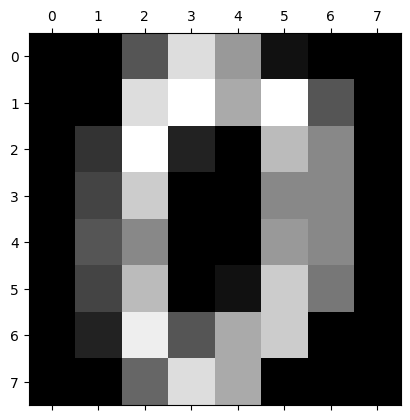

In [17]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.gray()
plt.matshow(dataset.data[0].reshape(8,8))

In [18]:
dataset.target

array([0, 1, 2, ..., 8, 9, 8])

In [19]:
#ahora emepzamos a trabajar
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [20]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)

pca_Xc = PCA(0.95) #Sacamos todas las variables necesarios para tener esa probabilida
X_pca_Xc = pca_Xc.fit_transform(df_scaled)
X_pca_Xc.shape
#solo se queda con 40 que son útiles, mentira.... hace una combiancion linar de las 64 para quedarse con 40

(1797, 40)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

NameError: name 'X' is not defined